# Convergencia do Zerinho ou Um

http://mapadobrincar.folha.com.br/brincadeiras/formulas-de-escolha/338-zero-ou-um

Todos os participantes dizem "zero ou um" e colocam as mãos para a frente, mostrando um dedo ou nenhum.

Se alguém colocar sozinho o um ou o zero, sai da brincadeira.

O resto continua, até ficarem só dois participantes, que decidem a brincadeira no par ou ímpar.

Pergunta: a medida que voce fica popular e conquista amigos, 
quantas jogadas sao necessarias para convergir o zerinho ou um (ou zezinho soltou um pum em algumas rodas de poucos amigos)

In [5]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# grupo de amigos
galera = np.arange(3,15)
# guardar informacao de convergencia para cada grupo de amigos
converge_galera = {}
media_galera = {}
desvio_galera = {}
min_galera = {}
max_galera = {}
numero_interacoes = 50
# testa convergencia para cada grupo de amigos
for amigos in galera:
    for interacao in xrange(numero_interacoes):
        i = 0
        while True:
            # jogadas de zerinho ou um
            zero_um = np.random.randint(0, 2, size=amigos)
            #print i, zero_um
            i += 1
            # uma maneira de testar quem sai
            if sum(zero_um) == 1 or sum(zero_um) == amigos-1:
                #print i,'converge'
                if converge_galera.has_key(amigos):
                    converge_galera[amigos].append(i)
                else:
                    converge_galera[amigos] = [i]
                break
    media_galera[amigos] = int(np.mean(converge_galera[amigos]))
    desvio_galera[amigos] = int(np.std(converge_galera[amigos]))
    min_galera[amigos] = int(np.min(converge_galera[amigos]))
    max_galera[amigos] = int(np.max(converge_galera[amigos]))


In [6]:
print media_galera
print desvio_galera
print min_galera
print max_galera

{3: 1, 4: 2, 5: 2, 6: 5, 7: 8, 8: 12, 9: 23, 10: 47, 11: 85, 12: 182, 13: 292, 14: 645}
{3: 0, 4: 1, 5: 2, 6: 5, 7: 7, 8: 12, 9: 23, 10: 51, 11: 65, 12: 190, 13: 233, 14: 608}
{3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 22, 14: 8}
{3: 4, 4: 7, 5: 13, 6: 21, 7: 37, 8: 50, 9: 135, 10: 230, 11: 256, 12: 788, 13: 938, 14: 2534}


In [25]:
##Ok, estamos vendo alguns valores importantes, porém, com o Pandas, esta visualização pode ser melhor:
print 'Valores médios :'

media_galera1= pd.Series(media_galera) 
media_galera1


Os valores médios são:


3       1
4       2
5       2
6       5
7       8
8      12
9      23
10     47
11     85
12    182
13    292
14    645
dtype: int64

In [26]:
print 'Desvio padrão :'

desvio_galera1 = pd.Series(desvio_galera)
desvio_galera1

Desvio padrão :


3       0
4       1
5       2
6       5
7       7
8      12
9      23
10     51
11     65
12    190
13    233
14    608
dtype: int64

In [27]:
print 'Valores mínimos :'

min_galera1= pd.Series(min_galera) 
min_galera1

Valores mínimos :


3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13    22
14     8
dtype: int64

In [28]:
print 'Valores máximos :'

max_galera1 = pd.Series(max_galera)
max_galera1

Valores máximos :


3        4
4        7
5       13
6       21
7       37
8       50
9      135
10     230
11     256
12     788
13     938
14    2534
dtype: int64

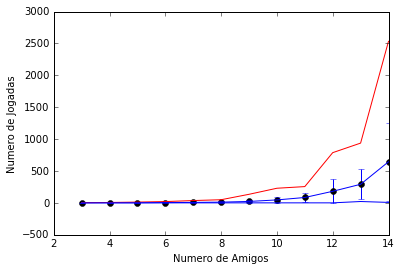

In [4]:
plt.plot(media_galera.keys(),media_galera.values(),'ko')
plt.plot(min_galera.keys(),min_galera.values(),'b-')
plt.plot(max_galera.keys(),max_galera.values(),'r-')

plt.errorbar(media_galera.keys(),media_galera.values(), yerr=desvio_galera.values())
plt.xlabel('Numero de Amigos')
plt.ylabel('Numero de Jogadas')